# Decoding the stimulus and the optimal kernel

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Decoding the stimulus and the optimal kernel

### a)

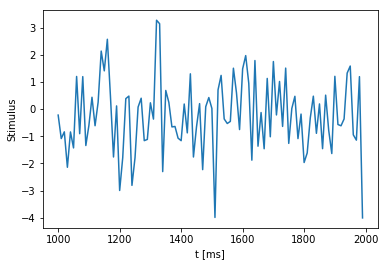

In [2]:
dt = 10  # ms
T = 500000
t = np.arange(0, T+1, dt)
stimulus = np.random.normal(0, np.sqrt(2), size=len(t))
plt.plot(t[100:200], stimulus[100:200])
plt.xlabel('t [ms]')
plt.ylabel('Stimulus')

### b)

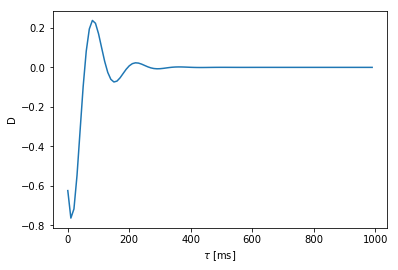

In [3]:
tau = np.arange(0, 1000, dt)
D = - np.cos(2 * np.pi * (tau - 20) / 140) * np.exp(- tau / 60)
plt.plot(tau, D)
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel('D')

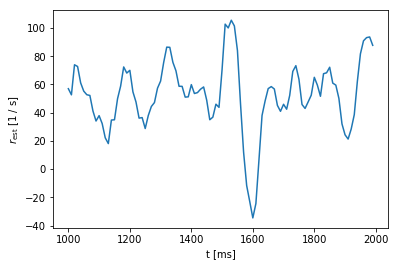

In [4]:
r_est = 50 + dt * np.convolve(D, stimulus, mode='same')
plt.plot(t[100:200], r_est[100:200])
plt.xlabel('t [ms]')
plt.ylabel('$r_\mathrm{est}$ [1 / s]')

### c)

In [5]:
from est_s import est_s

In [6]:
s_est, _, _, K = est_s(stimulus, r_est, nfft=2**12)

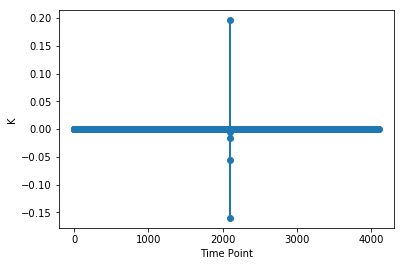

In [74]:
plt.plot(K, 'o-')
plt.xlabel('Time Point')
plt.ylabel('K')

Zooming in on the interesting part in the center:

(2090, 2130)

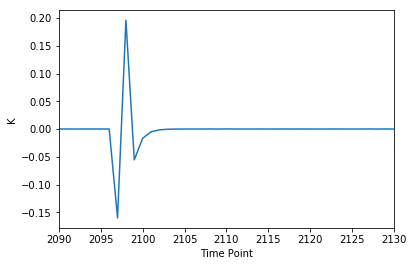

In [82]:
plt.plot(K, '-')
plt.xlabel('Time Point')
plt.ylabel('K')
plt.xlim(2090, 2130)

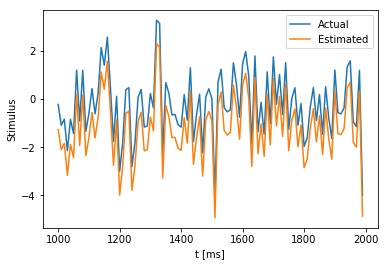

In [7]:
plt.plot(t[100:200], stimulus[100:200], label='Actual')
plt.plot(t[100:200], s_est[100:200], label='Estimated')
plt.xlabel('t [ms]')
plt.ylabel('Stimulus')
plt.legend()

### d)

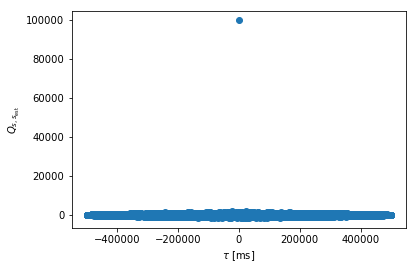

In [60]:
cor = np.correlate(stimulus, s_est, mode='full')
plt.plot(np.arange(-T, T+1, dt), cor, 'o')
plt.xlabel(r'$\tau$ [ms]')
plt.ylabel('$Q_{s, s_\mathrm{est}}$')

The cross-correlation at a time lag of $\tau$ = 0 is very high, i.e. the signals are very similar.

Zooming in on the interesting peak of the decoding kernel K (see plot above), it looks almost like an invert of the encoding kernel D.